In [7]:
%reload_ext autoreload
%autoreload 2

In [16]:
# imports
import os
import ast
import math
import json
import requests
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import ipywidgets as widgets

import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


from scipy import stats
from datetime import datetime as dt
from ipywidgets import interact, interactive, fixed, interact_manual

from IPython.display import HTML
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [8]:

import helpers


movies,characters = helpers.import_movies_data(".")


/Users/antoineschutz/Documents/GitHub/ada-2023-project-zalix/helpers.py:73: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  movies["year_released"] = pd.to_datetime(


In [17]:
movies

,wikipedia_movie_ID,freebase_movie_ID,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,year_released,tconst,averageRating,numVotes
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,tt0228333,4.9,56928.0
2,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1913,tt0002894,6.8,17.0
3,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",1938,tt0029852,6.8,2268.0
5,171005,/m/016ywb,Henry V,1989-11-08,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",1989,tt0097499,7.5,31208.0
6,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964,tt0058331,7.8,181829.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39346,21975745,/m/05p4tmc,Boy Meets Dog,1938-03-10,NaN,9.0,{},{},"{""/m/02hmvc"": ""Short Film""}",1938,tt0292458,5.5,131.0
39347,34474142,/m/0cpy07r,Frontier Fury,1943-06-24,NaN,55.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hfjk"": ""Western""}",1943,tt0035905,4.9,24.0
39348,28373912,/m/052nnlv,Jan Zizka,1956-02-05,NaN,105.0,"{""/m/01wgr"": ""Czech Language""}","{""/m/01mk6"": ""Czechoslovakia""}","{""/m/07s9rl0"": ""Drama"", ""/m/082gq"": ""War film""}",1956,tt0048223,6.8,174.0
39351,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1993,tt0107057,5.7,5748.0


In [20]:
movies["month_release"] = pd.DatetimeIndex(movies["movie_release_date"]).month

In [29]:
movies["year_released"].describe()

count    14369.000000
mean      1974.317559
std         29.947660
min       1894.000000
25%       1947.000000
50%       1982.000000
75%       2003.000000
max       2012.000000
Name: year_released, dtype: float64

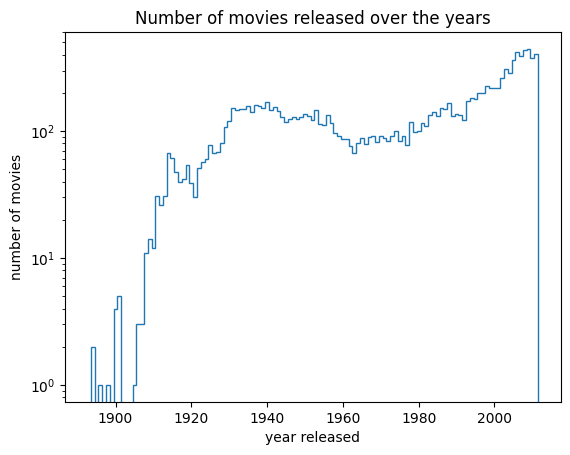

In [30]:
# plot the distribution of realese years
bins = np.arange(1893,  2013) - 0.5  # -0.5 for center-aligned bins
plt.hist(movies["year_released"], histtype="step", bins=bins, log=True)
plt.title("Number of movies released over the years")
plt.xlabel("year released")
plt.ylabel("number of movies")
plt.show()

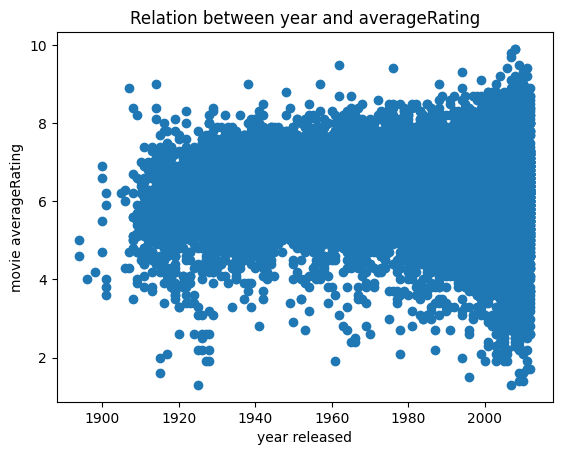

In [33]:
# plot the relation between year released and revenue
plt.scatter(movies["year_released"], movies["averageRating"])
plt.title("Relation between year and averageRating")
plt.xlabel("year released")
plt.ylabel("movie averageRating")

# removing outlier for better visualization
plt.show()